In [1]:
import pandas as pd
import torch
from utils import ma, format_data, window_format_data, convert_data

# data = pd.read_csv('AAPL.csv')
# data.set_index('Date', inplace=True)
# data = data[['Open', 'High', 'Low', 'Close']]

# years = 5
# s = years * 365

# data_mat_np = torch.Tensor(data.to_numpy())
# data_mat_np = data_mat_np[-s:]

c:\Users\Saleem\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from utils import API
from models import Embedder

a = API(outputsize='full')
# e = Embedder()
x = a.grab_raw_api_data()

In [8]:
# list(x['Time Series (Daily)'].keys())[-1]

'1999-11-01'

In [11]:
import pickle
with open('API_DATA_FULL.pkl', 'rb') as pickle_file:
	data = pickle.load(pickle_file)

In [17]:
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2024-12-23',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-12-23': {'1. open': '254.7700',
   '2. high': '255.6500',
   '3. low': '253.4500',
   '4. close': '255.2700',
   '5. volume': '40858774'},
  '2024-12-20': {'1. open': '248.0400',
   '2. high': '255.0000',
   '3. low': '245.6900',
   '4. close': '254.4900',
   '5. volume': '147495267'},
  '2024-12-19': {'1. open': '247.5000',
   '2. high': '252.0000',
   '3. low': '247.0949',
   '4. close': '249.7900',
   '5. volume': '60882264'},
  '2024-12-18': {'1. open': '252.1600',
   '2. high': '254.2800',
   '3. low': '247.7400',
   '4. close': '248.0500',
   '5. volume': '56774101'},
  '2024-12-17': {'1. open': '250.0800',
   '2. high': '253.8300',
   '3. low': '249.7800',
   '4. close': '253.4800',
   '5. volume': '51356360'},
  '2024-12-16': {'1. open': '

In [16]:
ts, col = convert_data(data, 'Daily')
mas = [50, 200]
ma(ts, mas[1]).shape
# ts.shape

torch.Size([6327, 4])

In [ ]:
mas = [50, 200]

torch.hstack((data_mat_np, 
			  *(ma(data_mat_np, e) for e in mas))).shape

# data_mat = np.hstack((data_mat_np, 
# 					  ma(data_mat_np, 50),
# 					  ma(data_mat_np, 200)))

torch.Size([1825, 12])

In [1]:
from text_embedding import WordEmbedder

EMBEDDING = ['word2vec-google-news-300', 'glove-twitter-200', 'fasttext-wiki-news-subwords-300']  #, 'conceptnet-numberbatch-17-06-300']

EMBEDDING_SIZE = sum(map(lambda x: int(x.split('-')[-1]), EMBEDDING))
embedder = WordEmbedder(EMBEDDING)

Loaded: word2vec-google-news-300 in  7.14 seconds
Loaded: glove-twitter-200 in  2.09 seconds
Loaded: fasttext-wiki-news-subwords-300 in  405.59 seconds


In [2]:
embedder.embed('hello brother how are you').shape
# 'hello how are you'.split()

['hello', 'brother', 'how', 'are', 'you']


torch.Size([5, 800])

In [4]:
from dotenv import find_dotenv, load_dotenv
import os 

_ = load_dotenv(find_dotenv())


In [5]:
import requests
from pprint import pprint
# # replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
# url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey={os.environ["ALPHA_API_KEY"]}'
# r = requests.get(url)
# data = r.json()

In [6]:
import pickle

In [7]:
# with open('NEWS_DATA.pkl', 'wb') as file:
# 	pickle.dump(data, file)

In [8]:
data_from_pickle = None
with open('NEWS_DATA.pkl', 'rb') as file:
	data_from_pickle = pickle.load(file)

In [9]:
embedder.embed(data_from_pickle['feed'][0]['summary']).shape

['Building', 'an', 'investment', 'portfolio', 'worth', '$1', 'million', 'or', 'more', 'is', 'a', 'dream', 'many', 'people', 'share,', 'yet', 'relatively', 'few', 'will', 'achieve.', 'In', 'fact,', 'when', 'asked', 'what', 'a', '"high', 'net', 'worth"', 'looks', 'like', 'in', 'a', '2023', 'survey', 'by', 'Empower,', 'the', 'median', 'response', 'was', '$400,000', '--', 'and', '74%', 'of', 'survey', 'participants', 'believed', "they'd", 'never', '...']


torch.Size([52, 800])

In [12]:
data_from_pickle

{'items': '50',
 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.',
 'feed': [{'title': "This Powerhouse Vanguard ETF Could Turn $300 Per Month Into $1.2 Million. Here's How.",
   'url': 'https://www.fool.com/investing/2024/12/21/this-powerhouse-vanguard-etf-could-turn-300-per-mo/',
   'time_published': '20241221T160000',
   'authors': ['Katie Brockman'],
   'summary': 'Building an investment portfolio worth $1 million or more is a dream many people share, yet relatively few will achieve. In fact, when asked what a "high net worth" looks like in a 2023 survey by Empower, the median response was $400,000 -- and 74% of survey participants believed they\'d never ...',
   'banner_image': 'https://g.foolcdn.com/image/?url=https%3A%2F%2Fg.foolcdn.com%2Feditorial%2Fimages%2F8012

In [10]:
data

NameError: name 'data' is not defined

In [22]:
stock_dict = data['feed'][10]

In [53]:
req_stock_related = []

for article in data['feed']:
	# pprint(article['ticker_sentiment'])
	req_stock_score = 0
	for e in article['ticker_sentiment']:
		# print()
		if e['ticker'] == "AAPL":
			req_stock_score = float(e['relevance_score'])
			# print(req_stock_score)
			break
	if req_stock_score > .5:
		req_stock_related.append(article)
	# break

In [55]:
len(req_stock_related)

9

In [21]:
pprint(stock_dict)

{'authors': ['Ananya Gairola'],
 'banner_image': 'https://cdn.benzinga.com/files/images/story/2024/12/06/Exclusive-Color-Options.jpeg?width=1200&height=800&fit=crop',
 'category_within_source': 'News',
 'overall_sentiment_label': 'Somewhat-Bullish',
 'overall_sentiment_score': 0.156067,
 'source': 'Benzinga',
 'source_domain': 'www.benzinga.com',
 'summary': 'Apple Inc. AAPL is reportedly working on its modem technology. '
            'This could result in slimmer iPhones and introduce cellular '
            'capabilities to Macs and headsets like Vision Pro. What Happened: '
            'Apple is developing a new modem, internally named Sinope, which '
            'is set to debut next year, reported ...',
 'ticker_sentiment': [{'relevance_score': '0.178459',
                       'ticker': 'QCOM',
                       'ticker_sentiment_label': 'Neutral',
                       'ticker_sentiment_score': '0.0'},
                      {'relevance_score': '0.740604',
                 

In [66]:
# res = requests.get(stock_dict['url'])
# body_start = res.text.find('<body')
# body_end = res.text.find('</body')
# text = res.text[body_start:body_end]


In [7]:
from pipeline import Gemini
model = Gemini().model

In [ ]:
summary_prompt = f"""Your task is to summarize the text delimited by triple backticks (```) \
Explain what would happen to the stock of the company that the text is talking about \
whether it will move up or down.

Use at most 120 words.

Text:
```{[:]}```
"""

In [8]:
prompt = f"""
Your task is to run a sentiment analysis on the dictionary that's delimited by triple backticks (```) \
this dictionary contains information about a stock in the stock market, you need to process the dictionary \
You need to return only a dictionary that contains whether to Buy or Sell and a score between 0 and 1 of how confident you are with your answer.
the keys of the dictionary should be, action, conf.

Don't add anything to the dictionary that's not mentioned above.
Don't wrap the dictionary in any delimiters.

dictionary:
```{stock_dict}```
"""

In [57]:
ret = model.generate_content(summary_prompt).text
ret = ret.replace("'", "\"")
# json.loads(ret)
print(ret)

The provided text does not mention any specific company"s stock or its potential movement. Therefore, I cannot provide an analysis of the stock"s performance based on the given context.


In [77]:
import json

In [79]:
gemini_output = json.loads(ret)

In [82]:
gemini_output['action']

'Buy'

In [6]:
import requests
import importlib
from pprint import pprint
import matplotlib.pyplot as plt
# import torch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import os

In [3]:
import models
importlib.reload(models)
import models

In [4]:
_ = load_dotenv(find_dotenv())

In [4]:
ALPHA_API_KEY = os.environ['ALPHA_API_KEY']
WINDOW = 60

In [6]:
data = pd.read_csv('AAPL.csv')
data.set_index('Date', inplace=True)
data = data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
data

,Open,High,Low,Close,Adj Close
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774
...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993


In [7]:
years = 5
s = years * 365
s

1825

In [8]:
def ma(ds, w):
	return np.array([
		np.concatenate((
			e[:w - 1], 
			np.convolve(e, np.ones(w), 'valid') / w)) 
			for e in ds.T]).T

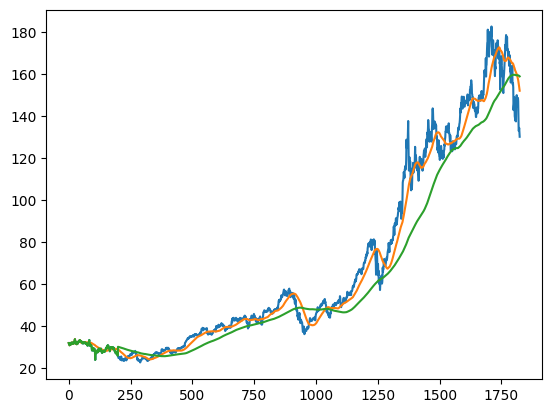

In [9]:
data_mat_np = data.to_numpy()
data_mat_np = data_mat_np[-s:]
plt.plot(data_mat_np[:, 0])
plt.plot(ma(data_mat_np, 50)[:, 0])
plt.plot(ma(data_mat_np, 200)[:, 0])
# plt.yscale('log')
# plt.xticks(range(ts.shape[0]), labels=list(data.index))


# data_mat = data_mat_np.tolist()
data_mat = np.hstack((data_mat_np, 
					  ma(data_mat_np, 50),
					  ma(data_mat_np, 200)))


In [17]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url_args = {
	"function": "TIME_SERIES_DAILY",
	"symbol": "AAPL",
	# "interval": "5min",
	"outputsize": "compact",
	"apikey": ALPHA_API_KEY
}

# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo'
url = f'https://www.alphavantage.co/query'

par = 'Daily' if url.__contains__('DAILY') else '5min'

r = requests.get(url, url_args)
data = r.json()

pprint(data)
print(len(data[f'Time Series ({par})']))


TS = list(map(lambda x: float(x['1. open']), data[f'Time Series ({par})'].values()))[::-1]
ticks = range(len(TS))
keys = list(data[f'Time Series ({par})'].keys())[::-1]

xlabels = [e if i % 5 == 0 else ' ' for i, e in enumerate(keys)]
xlabels[-1] = keys[-1]

plt.figure(figsize=(16, 5))
plt.plot(TS)
plt.xticks(ticks, labels=xlabels, rotation=90, fontsize=12)
plt.show()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and '
                                 'Volumes',
               '2. Symbol': 'AAPL',
               '3. Last Refreshed': '2024-12-10',
               '4. Output Size': 'Compact',
               '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-07-22': {'1. open': '227.0100',
                                        '2. high': '227.7800',
                                        '3. low': '223.0900',
                                        '4. close': '223.9600',
                                        '5. volume': '48201835'},
                         '2024-07-23': {'1. open': '224.3650',
                                        '2. high': '226.9400',
                                        '3. low': '222.6800',
                                        '4. close': '225.0100',
                                        '5. volume': '39960260'},
                         '2024-07-24': {'1. open': '224.0000',
   

KeyError: 'Time Series (5min)'

In [34]:
ts = [data['Time Series (Daily)'][e] for e in sorted(data['Time Series (Daily)'])]
# ts = list(map(lambda x: list(map(float, x.values()))[:-1], ts))
# ts = torch.Tensor(ts)
list(ts[0].keys())

['1. open', '2. high', '3. low', '4. close', '5. volume']

In [14]:
import pickle

In [15]:
with open('API_DATA_5min.pkl', 'wb') as pickle_file:
	pickle.dump(data, pickle_file)

In [ ]:
pickle.load()


TypeError: file must have 'read' and 'readline' attributes

In [263]:
# print((len(TS) * 5) / 60) 

In [264]:
# data[f'Time Series ({par})']

In [265]:
columns = data[f'Time Series ({par})'][keys[0]].keys()
columns

dict_keys(['1. open', '2. high', '3. low', '4. close', '5. volume'])

In [266]:
data_mat_api = list(map(lambda x: [float(x[e]) for e in columns], data[f'Time Series ({par})'].values()))[::-1]
data_mat_api = np.array(data_mat_api)
data_mat_api

array([[2.28920000e+02, 2.32640000e+02, 2.28680000e+02, 2.30540000e+02,
        5.30465270e+07],
       [2.36480000e+02, 2.37230000e+02, 2.33090000e+02, 2.34400000e+02,
        6.26312520e+07],
       [2.35000000e+02, 2.36270000e+02, 2.32330000e+02, 2.34820000e+02,
        4.32342780e+07],
       [2.29450000e+02, 2.31459900e+02, 2.26640000e+02, 2.28880000e+02,
        5.73458840e+07],
       [2.30280000e+02, 2.30440000e+02, 2.22270000e+02, 2.24180000e+02,
        6.60345850e+07],
       [2.24820000e+02, 2.26800000e+02, 2.23275000e+02, 2.24310000e+02,
        4.91514530e+07],
       [2.27010000e+02, 2.27780000e+02, 2.23090000e+02, 2.23960000e+02,
        4.82018350e+07],
       [2.24365000e+02, 2.26940000e+02, 2.22680000e+02, 2.25010000e+02,
        3.99602600e+07],
       [2.24000000e+02, 2.24800000e+02, 2.17130000e+02, 2.18540000e+02,
        6.17775760e+07],
       [2.18930000e+02, 2.20850000e+02, 2.14620000e+02, 2.17490000e+02,
        5.13911990e+07],
       [2.18700000e+02, 2.1949

In [223]:
sc = StandardScaler()
# sc = MinMaxScaler(feature_range=(0, 1))
data_mat_scaled = sc.fit_transform(data_mat)

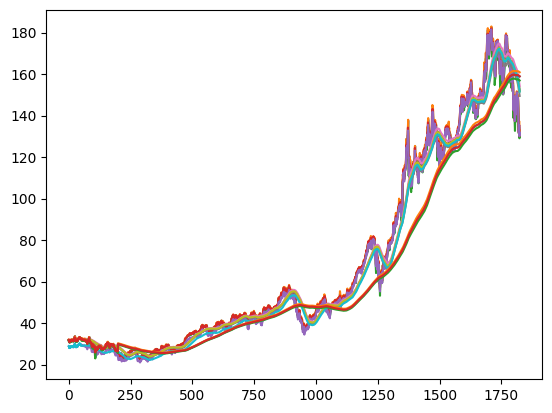

In [224]:
plt.plot(data_mat[:, :-1])
plt.show()
# data_mat_scaled = data_mat

In [225]:
X_seq = []
y_seq = []

for i in range(WINDOW, data_mat_scaled.shape[0]):
	X_seq.append(data_mat_scaled[i-WINDOW:i, :])
	y_seq.append(data_mat_scaled[i, :5])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

X_seq = torch.Tensor(X_seq)
y_seq = torch.Tensor(y_seq)


In [226]:
X_seq.shape, y_seq.shape

(torch.Size([1765, 60, 15]), torch.Size([1765, 5]))

In [227]:
split = 0.8
split = int(y_seq.shape[0] * split)

In [228]:
X_train, y_train = X_seq[:split], y_seq[:split]
X_val, y_val = X_seq[split:], y_seq[split:]

In [229]:
X_train.shape

torch.Size([1412, 60, 15])

In [243]:
lstm = models.LSTM(input_size=15, output_size=5, num_layers=3)
lstm(X_train).shape

torch.Size([1412, 5])

In [244]:
importlib.reload(models)
import models

In [245]:
import pipeline
importlib.reload(pipeline)
import pipeline

In [246]:
# a = pipeline.agent()

In [247]:
# a.api_call().shape

In [248]:
models.train_model(lstm, X_train, y_train, lr=.005, epochs=80)

[1/80] - loss: 0.3981342017650604
[2/80] - loss: 0.3805767595767975
[3/80] - loss: 0.36550480127334595
[4/80] - loss: 0.35199397802352905
[5/80] - loss: 0.3400322198867798
[6/80] - loss: 0.32943961024284363
[7/80] - loss: 0.3195083439350128
[8/80] - loss: 0.31067904829978943
[9/80] - loss: 0.30148500204086304
[10/80] - loss: 0.2901199162006378
[11/80] - loss: 0.2761017680168152
[12/80] - loss: 0.25906476378440857
[13/80] - loss: 0.24046000838279724
[14/80] - loss: 0.22180648148059845
[15/80] - loss: 0.2018173187971115
[16/80] - loss: 0.18230077624320984
[17/80] - loss: 0.16223077476024628
[18/80] - loss: 0.14260916411876678
[19/80] - loss: 0.12238830327987671
[20/80] - loss: 0.10397129505872726
[21/80] - loss: 0.09172557294368744
[22/80] - loss: 0.08347345888614655
[23/80] - loss: 0.07969628274440765
[24/80] - loss: 0.07331458479166031
[25/80] - loss: 0.06777656823396683
[26/80] - loss: 0.06190704181790352
[27/80] - loss: 0.06207215040922165
[28/80] - loss: 0.06306151300668716
[29/80] 

In [249]:
lstm.eval()
pred = lstm(X_train).detach()


In [250]:
pred.shape

torch.Size([1412, 5])

In [251]:
y_train.shape

torch.Size([1412, 5])

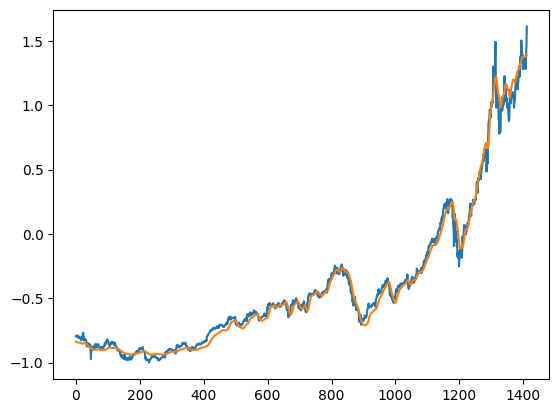

In [252]:
# plt.plot(data_mat[-(data_mat.shape[0] - WINDOW):, 0])
plt.plot(y_train[:, 0])
plt.plot(pred[:, 0])


In [253]:
pred_val = lstm(X_val).detach()

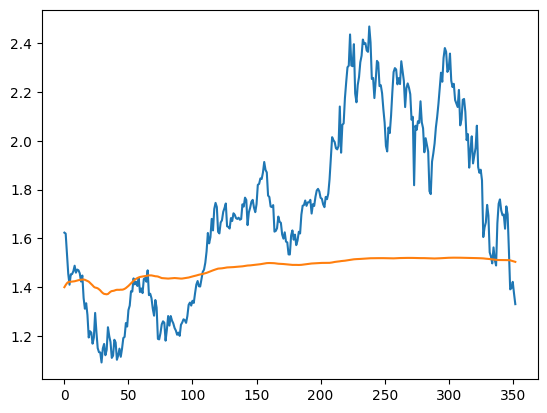

In [254]:
plt.plot(y_val[:, 0])
plt.plot(pred_val[:, 0])


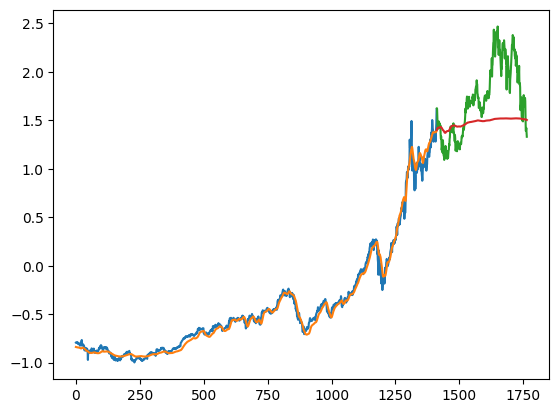

In [255]:
# plt.plot(data_mat[-(data_mat.shape[0] - WINDOW):, 0])


plt.plot(y_train[:, 0])
plt.plot(pred[:, 0])

plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_val.shape[0]), y_val[:, 0])
plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_val.shape[0]), pred_val[:, 0])


In [61]:
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=demo'
r = requests.get(url)
data = r.json()

pprint(data)

{'feed': [{'authors': ['Trevor Jennewine'],
           'banner_image': 'https://g.foolcdn.com/editorial/images/799811/bull-and-bear-3.jpg',
           'category_within_source': 'n/a',
           'overall_sentiment_label': 'Somewhat-Bullish',
           'overall_sentiment_score': 0.241405,
           'source': 'Motley Fool',
           'source_domain': 'www.fool.com',
           'summary': 'Nvidia ( NASDAQ: NVDA ) and Apple ( NASDAQ: AAPL ) are '
                      'two of the most popular stocks among retail investors, '
                      'but the billionaires listed below bought one and sold '
                      'the other in the third quarter.Investors should pay '
                      'close attention to the trades made by Steven Cohen.',
           'ticker_sentiment': [{'relevance_score': '0.045569',
                                 'ticker': 'SSNLF',
                                 'ticker_sentiment_label': 'Neutral',
                                 'ticker_sentiment_

In [ ]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TOP_GAINERS_LOSERS&apikey=demo'
r = requests.get(url)
data = r.json()

pprint(data)

{'last_updated': '2024-11-15 16:15:58 US/Eastern',
 'metadata': 'Top gainers, losers, and most actively traded US tickers',
 'most_actively_traded': [{'change_amount': '0.0981',
                           'change_percentage': '52.4038%',
                           'price': '0.2853',
                           'ticker': 'CERO',
                           'volume': '1166494735'},
                          {'change_amount': '-0.0041',
                           'change_percentage': '-15.6489%',
                           'price': '0.0221',
                           'ticker': 'ELAB',
                           'volume': '356447065'},
                          {'change_amount': '-4.78',
                           'change_percentage': '-3.257%',
                           'price': '141.98',
                           'ticker': 'NVDA',
                           'volume': '246510902'},
                          {'change_amount': '0.3848',
                           'change_percentage': '43.4